# <font color =red>**Sentiment Analysis**

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("final_gcc_clean.csv") #Cleaned data

In [4]:
data.head()

,subject_level_1_desc,subject_level_2_desc,subject_level_3_desc,sentiment_desc,comm_type,verbatim_cdownload_content,fiscal_period,clean
0,Feedback - FBK,Other,Other,Negative,Facebook,Rinse your mouth then spit in your hands. Get ...,5/15/2020,rinse mouth spit hand get double duty one product
1,Feedback - FBK,Other,Other,Negative,Instagram,@listerine is going to hate you @joerogan ð???,8/8/2019,going hate
2,Feedback - FBK,Other,Other,Neutral,Facebook,#Listerine \nMorning breath is definitely the ...,7/3/2019,listerine morning breath definitely worst
3,Inquiry,Marketing Services,Availability,Negative,Facebook,Why was the prebrush rinse discontinued and is...,10/1/2018,prebrush rinse discontinued something similar
4,Inquiry,Product,Product Attribute,Positive,Facebook,Thats the onley one i bi love it,6/14/2020,thats onley one bi love


In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
VaderAnalyzer = SentimentIntensityAnalyzer()

In [6]:
data['Polarity'] = [VaderAnalyzer.polarity_scores(x)['compound'] for x in data['verbatim_cdownload_content']]

In [7]:
data['Vader_sentiment'] = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in data['Polarity']]

In [8]:
data.head()

,subject_level_1_desc,subject_level_2_desc,subject_level_3_desc,sentiment_desc,comm_type,verbatim_cdownload_content,fiscal_period,clean,Polarity,Vader_sentiment
0,Feedback - FBK,Other,Other,Negative,Facebook,Rinse your mouth then spit in your hands. Get ...,5/15/2020,rinse mouth spit hand get double duty one product,0.0000,neutral
1,Feedback - FBK,Other,Other,Negative,Instagram,@listerine is going to hate you @joerogan ð???,8/8/2019,going hate,-0.6416,negative
2,Feedback - FBK,Other,Other,Neutral,Facebook,#Listerine \nMorning breath is definitely the ...,7/3/2019,listerine morning breath definitely worst,0.5892,positive
3,Inquiry,Marketing Services,Availability,Negative,Facebook,Why was the prebrush rinse discontinued and is...,10/1/2018,prebrush rinse discontinued something similar,0.0000,neutral
4,Inquiry,Product,Product Attribute,Positive,Facebook,Thats the onley one i bi love it,6/14/2020,thats onley one bi love,0.6369,positive


([<matplotlib.patches.Wedge at 0x24d8cd11188>,
 [Text(-1.094097998561085, 0.11379617543937107, 'Positive'),
  Text(0.7429393871421826, -0.8111973046261917, 'Neutral'),
  Text(0.729986987808738, 0.8228724066524078, 'Negative')],
 [Text(-0.5967807264878645, 0.06207064114874785, '46.7%'),
  Text(0.40523966571391773, -0.4424712570688318, '30.2%'),
  Text(0.39817472062294795, 0.4488394945376769, '23.1%')])

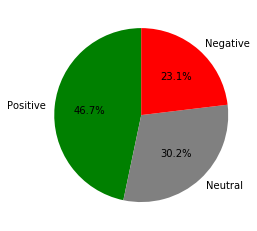

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig,axis = plt.subplots()
x = list(data['sentiment_desc'].value_counts().index)
y = list(data['sentiment_desc'].value_counts().values)

colours = {x[0]: 'green',
           x[1]: 'grey',
           x[2]: 'red',}
#axis.pie(y,labels = x, autopct = '%1.1f%%', startangle = 90)

axis.pie(y,
          labels=x,
          colors=[colours[key] for key in x], autopct = '%1.1f%%', startangle = 90)

([<matplotlib.patches.Wedge at 0x24d8cd69508>,
 [Text(-1.0921566354238512, -0.13112545023622757, 'positive'),
  Text(0.9899144388581957, -0.4796555052744247, 'neutral'),
  Text(0.5942381517829353, 0.9256786801939436, 'negative')],
 [Text(-0.5957218011402824, -0.07152297285612412, '53.8%'),
  Text(0.5399533302862886, -0.26163027560423163, '28.0%'),
  Text(0.3241299009725101, 0.504915643742151, '18.2%')])

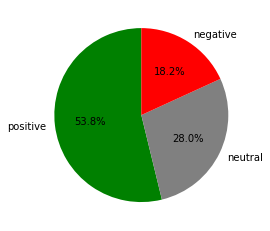

In [11]:
fig,axis = plt.subplots()
x = list(data['Vader_sentiment'].value_counts().index)
y = list(data['Vader_sentiment'].value_counts().values)

colours = {x[0]: 'green',
           x[1]: 'grey',
           x[2]: 'red',}
#axis.pie(y,labels = x, autopct = '%1.1f%%', startangle = 90)

axis.pie(y,
          labels=x,
          colors=[colours[key] for key in x], autopct = '%1.1f%%', startangle = 90)